# **Mounting Drive Content**

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
#!pip install tensorflow==2.2.0 keras==2.3.1

# **Importing the Library**

In [3]:
from tensorflow.keras.layers import Dense, Flatten, Input, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [4]:
tf.__version__

'2.7.0'

# **Image Data Exploration**

#lung  Data**

In [5]:
# Resizinig all the images to (224,224)
IMAGE_SIZE = [224,224]

train_path = 'input/train'
test_path = 'input/test'

# **Image Processing & Scaling**

In [6]:
# Scaling all the images between 0 to 1

train_datagen = ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=False)

# Performing only scaling on the test dataset

test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_set = train_datagen.flow_from_directory(train_path,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical')

Found 1097 images belonging to 3 classes.
Found 1097 images belonging to 3 classes.


# **Deep Learning Model**

# **InceptionV3**

In [8]:
mob = InceptionV3(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [9]:
x1= Flatten()(mob.output)
prediction1 = Dense(3, activation='softmax')(x1)
model12 = Model(inputs = mob.inputs, outputs = prediction1)
model12.summary()
model12.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [10]:
r1 = model12.fit_generator(train_set, validation_data=test_set, epochs=10, steps_per_epoch=len(train_set), validation_steps=len(test_set))

C:\Users\Nikitha\AppData\Local\Temp/ipykernel_12808/4229122695.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r1 = model12.fit_generator(train_set, validation_data=test_set, epochs=10, steps_per_epoch=len(train_set), validation_steps=len(test_set))


Epoch 1/10
35/35 [==============================] - 273s 8s/step - loss: 1.0383 - accuracy: 0.7575 - val_loss: 26898.1641 - val_accuracy: 0.5114
Epoch 2/10
35/35 [==============================] - 277s 8s/step - loss: 0.4196 - accuracy: 0.8396 - val_loss: 207.0035 - val_accuracy: 0.5378
Epoch 3/10
35/35 [==============================] - 254s 7s/step - loss: 0.3522 - accuracy: 0.8660 - val_loss: 136.5137 - val_accuracy: 0.6536
Epoch 4/10
35/35 [==============================] - 251s 7s/step - loss: 0.2973 - accuracy: 0.8769 - val_loss: 1.8431 - val_accuracy: 0.7274
Epoch 5/10
35/35 [==============================] - 259s 7s/step - loss: 0.2010 - accuracy: 0.9198 - val_loss: 0.5210 - val_accuracy: 0.8997
Epoch 6/10
35/35 [==============================] - 250s 7s/step - loss: 0.1964 - accuracy: 0.9243 - val_loss: 1.0077 - val_accuracy: 0.9180
Epoch 7/10
35/35 [==============================] - 251s 7s/step - loss: 0.1807 - accuracy: 0.9380 - val_loss: 0.5099 - val_accuracy: 0.7922
Epoch

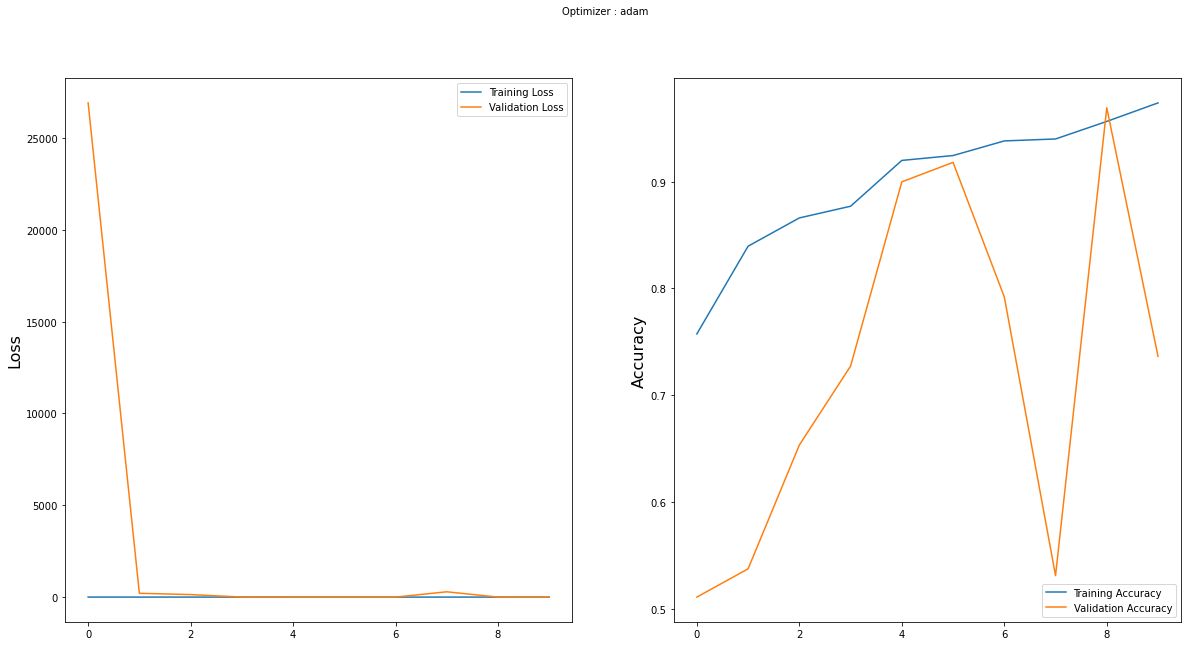

In [11]:
import matplotlib.pyplot as plt

x=r1
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# **InceptionResNetV2**

In [12]:
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
from tensorflow.keras.models import Model
inc=InceptionResNetV2(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [13]:
x31 = Flatten()(inc.output)
predictionss = Dense(3, activation='softmax')(x31)

In [14]:
modelss = Model(inputs = inc.inputs, outputs = predictionss)
modelss.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 111, 111, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                           

In [15]:
modelss.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
r2 = modelss.fit_generator(train_set,validation_data=test_set, epochs=10, steps_per_epoch=len(train_set) ,validation_steps=len(test_set))
x=r2

C:\Users\Nikitha\AppData\Local\Temp/ipykernel_12808/3104008920.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r2 = modelss.fit_generator(train_set,validation_data=test_set, epochs=10, steps_per_epoch=len(train_set) ,validation_steps=len(test_set))


Epoch 1/10
35/35 [==============================] - 663s 19s/step - loss: 1.2724 - accuracy: 0.7584 - val_loss: 132.0829 - val_accuracy: 0.5943
Epoch 2/10
35/35 [==============================] - 713s 20s/step - loss: 0.6308 - accuracy: 0.8259 - val_loss: 332562.5625 - val_accuracy: 0.5342
Epoch 3/10
35/35 [==============================] - ETA: 0s - loss: 0.2711 - accuracy: 0.8870 

UnknownError:  FileNotFoundError: [Errno 2] No such file or directory: 'input/test\\Malignant cases\\Malignant case (2).jpg'
Traceback (most recent call last):

  File "C:\Users\Nikitha\anaconda3\lib\site-packages\tensorflow\python\ops\script_ops.py", line 275, in __call__
    ret = func(*args)

  File "C:\Users\Nikitha\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py", line 649, in wrapper
    return func(*args, **kwargs)

  File "C:\Users\Nikitha\anaconda3\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py", line 992, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "C:\Users\Nikitha\anaconda3\lib\site-packages\keras\engine\data_adapter.py", line 834, in wrapped_generator
    for data in generator_fn():

  File "C:\Users\Nikitha\anaconda3\lib\site-packages\keras\engine\data_adapter.py", line 960, in generator_fn
    yield x[i]

  File "C:\Users\Nikitha\anaconda3\lib\site-packages\keras_preprocessing\image\iterator.py", line 65, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)

  File "C:\Users\Nikitha\anaconda3\lib\site-packages\keras_preprocessing\image\iterator.py", line 227, in _get_batches_of_transformed_samples
    img = load_img(filepaths[j],

  File "C:\Users\Nikitha\anaconda3\lib\site-packages\keras_preprocessing\image\utils.py", line 113, in load_img
    with open(path, 'rb') as f:

FileNotFoundError: [Errno 2] No such file or directory: 'input/test\\Malignant cases\\Malignant case (2).jpg'


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_test_function_65507]

In [ ]:
import matplotlib.pyplot as plt

x=r2
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# **Model Saving For Leaf Disease**

In [ ]:
modelss.save('model.h5')

In [ ]:
model12.save('model12.h5')